In [41]:
import pandas as pd
import ast

df = pd.read_csv("global_cleaned_hashtagz.csv")

In [42]:
# Assuming you have other features and a target variable
X = df.drop(['Average_Engagement_Rate', 'Hashtags_(dictionary)'], axis=1)  # Add other numerical features
y = df['Average_Engagement_Rate']

Mean Squared Error: 18.543132067793433
R-squared: 0.628172543722406


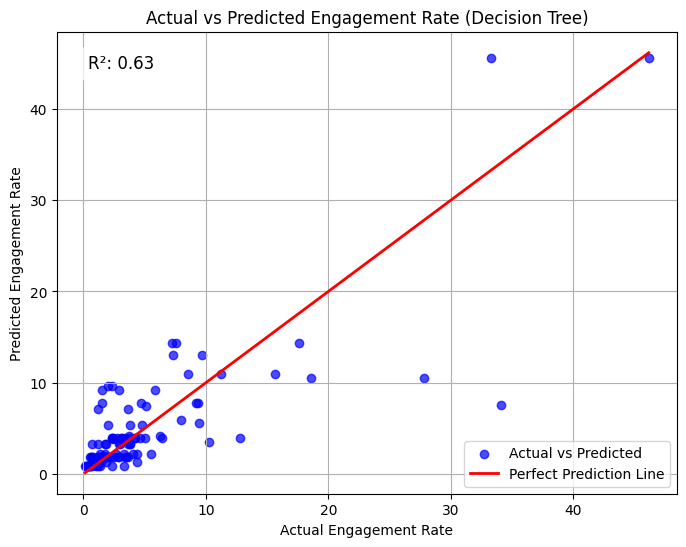

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def process_hashtags(hashtags_column):
    # Convert the string representation of the dictionary into an actual dictionary
    def safe_eval(val):
        try:
            # Only apply eval if the value is a valid string representation of a dictionary
            return eval(val) if isinstance(val, str) else {}
        except:
            return {}

    hashtags_column = hashtags_column.apply(safe_eval)
    
    # Count the number of unique hashtags (length of the dictionary)
    hashtags_column = hashtags_column.apply(lambda x: len(x) if isinstance(x, dict) else 0)
    
    return hashtags_column


# Process the hashtags column in df
df['Hashtags_Count'] = process_hashtags(df['Hashtags_(dictionary)'])

df = df.drop(columns=['Hashtags_(dictionary)'])

# Drop 'Average_Engagement_Rate' from features to create independent variables
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Model with hashtags only
X_with_hashtags = X  # Includes Hashtags_Count

# Split data for the model with hashtags
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with hashtags
model = DecisionTreeRegressor(max_depth=7,               # Limit tree depth
    min_samples_split=10,      # Require more samples to split a node
    min_samples_leaf=5,        # Minimum samples in leaf nodes
    random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_with_hashtags = model.predict(X_test)

# Print performance metrics with hashtags
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_with_hashtags)}')
print(f'R-squared: {r2_score(y_test, y_pred_with_hashtags)}')

# Optionally, plot to compare the performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_with_hashtags, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R²: {r2_score(y_test, y_pred_with_hashtags):.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Decision Tree)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

In [18]:
X['Hashtags_Sum'].fillna(0, inplace=True)  # Replace NaNs in Hashtags_Count with 0


C:\Users\Gabriel Anderson\AppData\Local\Temp\ipykernel_12004\1042132782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Hashtags_Sum'].fillna(0, inplace=True)  # Replace NaNs in Hashtags_Count with 0


In [58]:
# Calculate the mean for Hashtags_Count and Hashtags_Sum columns
hashtags_count_mean = df['Hashtags_Count'].mean()
hashtags_sum_mean = df['Hashtags_Sum'].mean()

# Fill missing values with the respective mean
df['Hashtags_Count'].fillna(hashtags_count_mean, inplace=True)
df['Hashtags_Sum'].fillna(hashtags_sum_mean, inplace=True)


C:\Users\Gabriel Anderson\AppData\Local\Temp\ipykernel_25280\634886375.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hashtags_Count'].fillna(hashtags_count_mean, inplace=True)
C:\Users\Gabriel Anderson\AppData\Local\Temp\ipykernel_25280\634886375.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [45]:
print(X.isnull().sum())    

Followers                            0
Average_Likes                        0
Average_Comments                     0
Engagement_Rate_(60_Days)            0
Posting_frequency_(last_60_days)     0
Posts_(image)                        0
Posts_(videos)                       0
Posts_(carousel)                     0
Average_Hashtags_/_Post_(60_Days)    0
Hashtags_Count                       0
Hashtags_Sum                         0
dtype: int64


In [34]:
df['Hashtags_Sum'].fillna(0, inplace=True)  # Replace NaNs in Hashtags_Count with 0


C:\Users\Gabriel Anderson\AppData\Local\Temp\ipykernel_12004\2973173901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hashtags_Sum'].fillna(0, inplace=True)  # Replace NaNs in Hashtags_Count with 0


In [61]:
df.dtypes

Followers                              int64
Average_Likes                        float64
Average_Comments                     float64
Average_Engagement_Rate              float64
Engagement_Rate_(60_Days)            float64
Posting_frequency_(last_60_days)       int64
Posts_(image)                          int64
Posts_(videos)                         int64
Posts_(carousel)                       int64
Average_Hashtags_/_Post_(60_Days)    float64
Hashtags_(dictionary)                 object
Hashtags_Count                       float64
Hashtags_Sum                         float64
dtype: object

Mean Squared Error: 47.82083030278635
R-squared: 0.04109523549958627


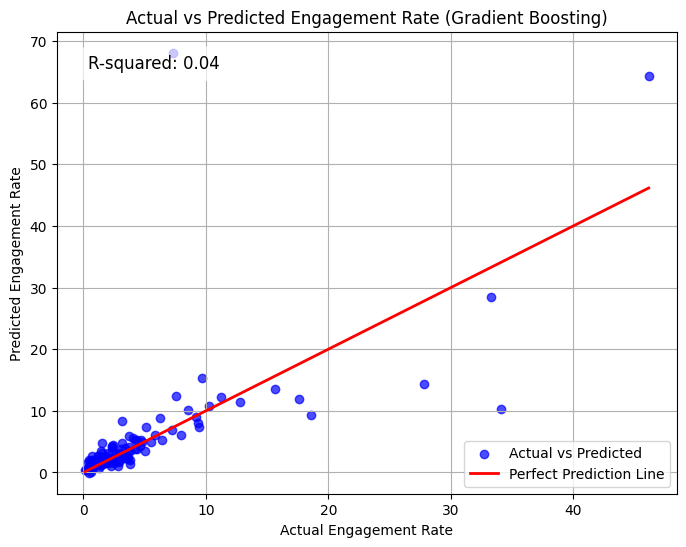

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Gradient Boosting)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 29.3194389330549
R-squared: 0.41208570601194394


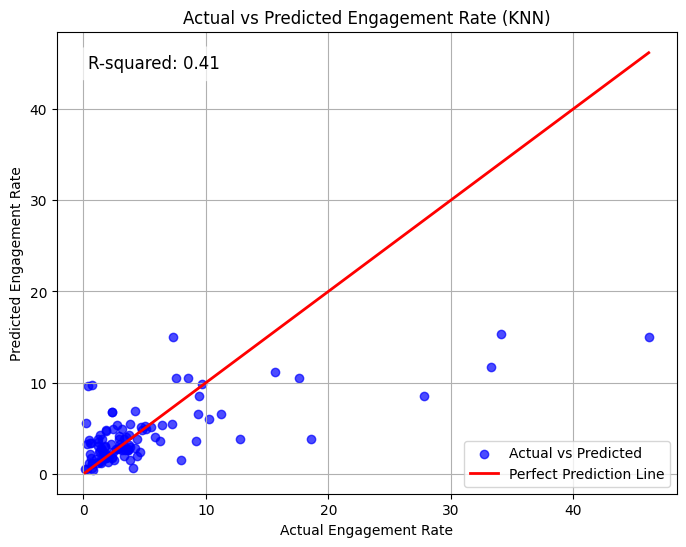

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree Regressor model
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (KNN)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 36.79422714671826
R-squared: 0.26220102215492413


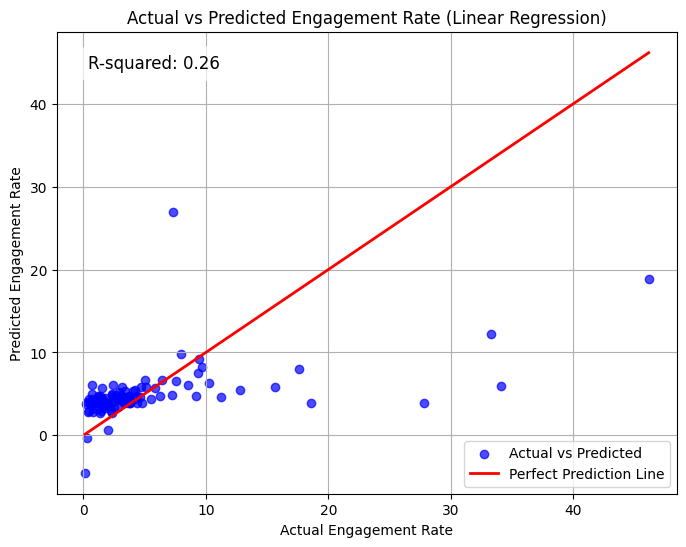

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Linear Regression)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 18.771756400728403
R-squared: 0.6235881615453509


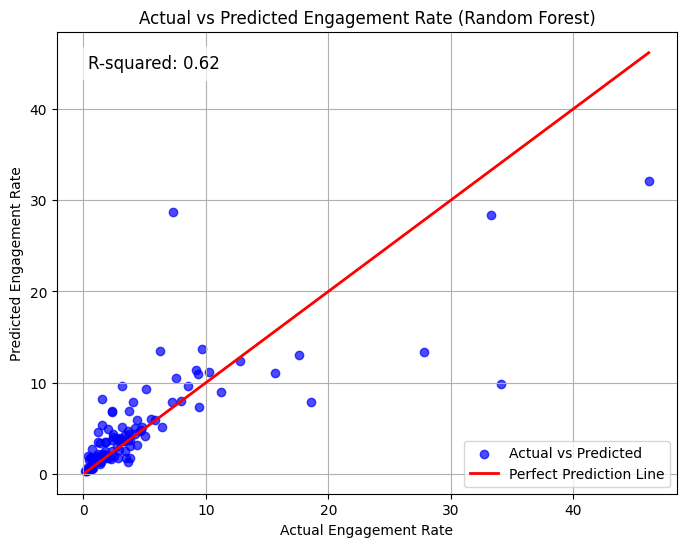

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Random Forest)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 24.303602867224463
R-squared: 0.5126634055421333


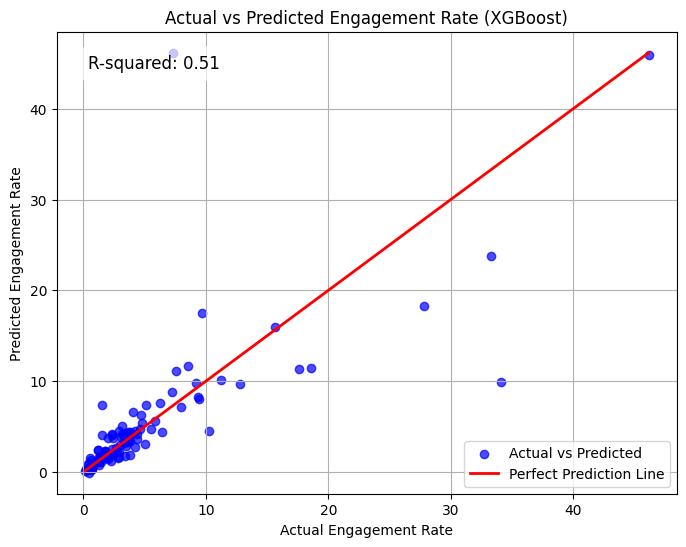

In [50]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataframe is named `df`
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs Predicted')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R-squared: {r2:.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (XGBoost)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()